Analyzing Sentiments: 100%|██████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3899.28it/s]


neutral     383
positive    366
negative    251
Name: sentiment, dtype: int64


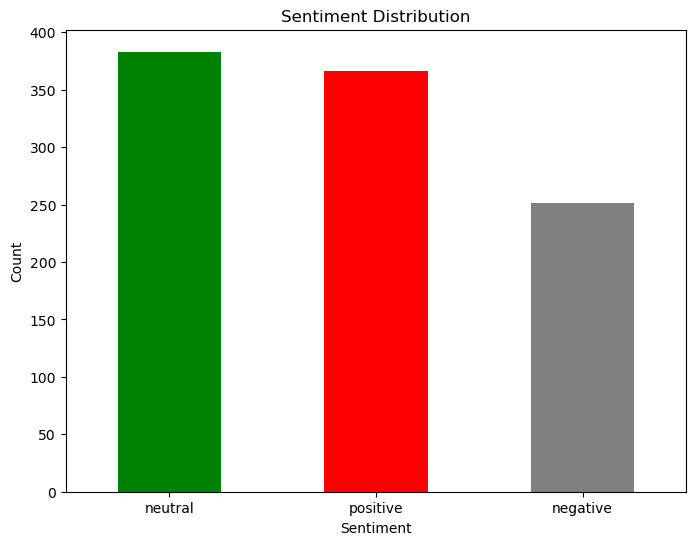

In [2]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from tqdm import tqdm  

# Load your CSV file
df = pd.read_csv("C:\\Users\\...\\...\\Projects\\Sentiment_Analysis\\tweet_sentiment.csv")

 # Preprocess the data
def preprocess_text(text):
    """
    Preprocess the text by converting to lowercase, removing URLs, and special characters.
    """
    text = text.lower()  
    text = re.sub(r'http\S+|www\S+', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Apply text preprocessing
df.dropna(subset=['tweet'], inplace=True)  # Drop rows with missing values in 'tweet' column
df['tweet'] = df['tweet'].apply(preprocess_text)

# Step 3: Define function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    """
    Analyzes sentiment of the given text using TextBlob.
    Returns 'positive', 'negative', or 'neutral' based on polarity.
    """
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Use tqdm for a progress bar during sentiment analysis
tqdm.pandas(desc="Analyzing Sentiments")
df['sentiment'] = df['tweet'].progress_apply(analyze_sentiment)

# Step 4: Check the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Step 5: Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Step 6: Optional - Save the results with sentiment labels to a new CSV file
df.to_csv('sentiment_analyzed_data.csv', index=False)

